In [54]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, linear_model
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = sklearn.datasets.load_diabetes();
header = data['feature_names']
df = pd.DataFrame(data['data'],columns=header)
print(data['DESCR'])
target = data['target']

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [3]:
df['target']=target;
df.loc[df['sex']<0,'sex']= -1
df.loc[df['sex']>0,'sex']=1

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1.0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-1.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,1.0,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-1.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-1.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
X=df.loc[:,'bmi':'s6']
y=df['target']
reg = linear_model.LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.500232039606541

In [17]:
print(reg.coef_)
print(reg.intercept_)

[ 557.7997525   268.42486586 -707.37032893  411.84477785  135.61459762
  126.87953754  750.50608762   43.78004519]
152.13348416289656


In [9]:
#calculate the prediction on the i-th sample and the actual value and the difference
def pred(i):
    print(sum(df.loc[i][2:-1]*reg.coef_)+reg.intercept_)
    print(df['target'][i])

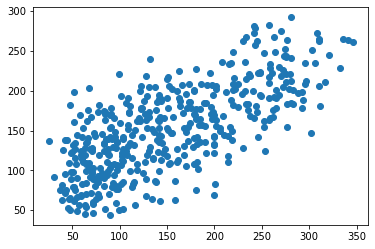

In [13]:
x=df['target']
pred = reg.predict(X)
plt.scatter(df['target'],pred)

<AxesSubplot:>

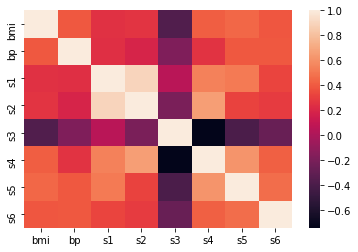

In [45]:
 sns.heatmap(X.corr())

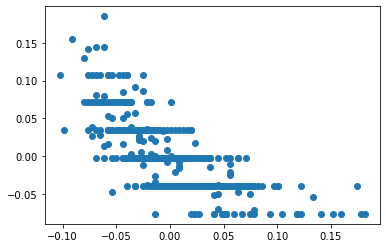

In [41]:
s3=X['s3']
s4=X['s4']
s3=pd.Series.to_frame(s3)
s4=pd.Series.to_frame(s4)
regs = linear_model.LinearRegression()
regs.fit(s3,s4)
regs.score(s3,s4)
plt.scatter(s3,s4)